In [12]:
import os
import torchvision
import pytesseract
import cv2
import matplotlib.pyplot as plt

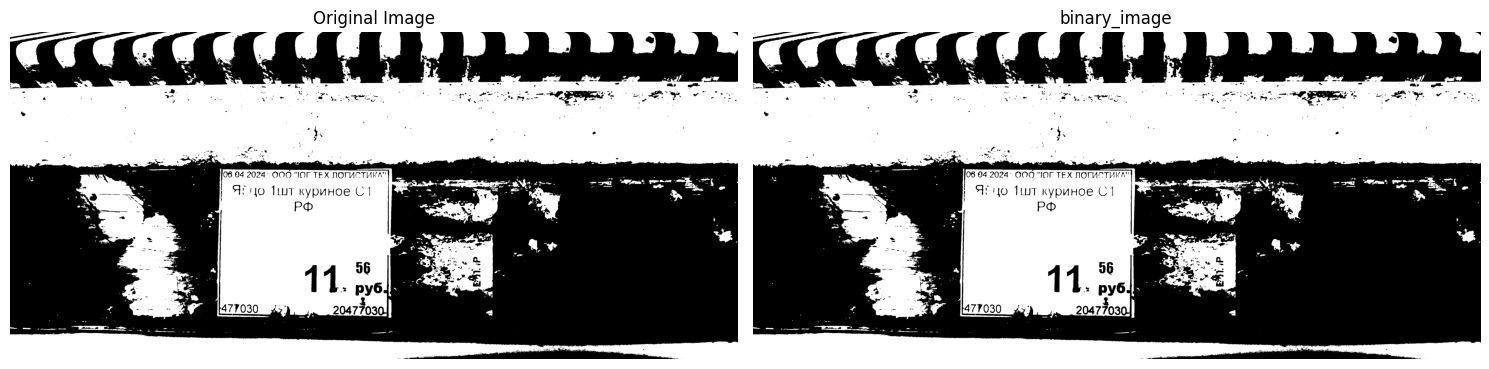

In [19]:
img = cv2.imread('dnr-train/train/IMG_20240408 (11).jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(5,5))
enhanced_image = clahe.apply(gray_img)

_, binary_image = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contour_image = binary_image.copy()
cv2.drawContours(contour_image, contours, 1, (255, 255, 255), 1)

fig, axes = plt.subplots(ncols=2, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(binary_image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(contour_image, cmap=plt.cm.gray)
ax[1].set_title('binary_image')
for a in ax:
    a.set_axis_off()
plt.tight_layout()
plt.show()

In [35]:
text = pytesseract.image_to_string(binary_image)

In [36]:
text

'oy\n\n06.04.2024" OOO “INT TEX NOMMCTUKA"\n\nAro Tu KypuHoe C1\nPom\n\n'

In [ ]:
image_file = "text.png"
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

# Get contours
contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

output = img.copy()

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
    # hierarchy[i][0]: the index of the next contour of the same level
    # hierarchy[i][1]: the index of the previous contour of the same level
    # hierarchy[i][2]: the index of the first child
    # hierarchy[i][3]: the index of the parent
    if hierarchy[0][idx][3] == 0:
        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)


cv2.imshow("Input", img)
cv2.imshow("Enlarged", img_erode)
cv2.imshow("Output", output)
cv2.waitKey(0)